In [1]:
import os
import kagglehub
import warnings
import torch

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from classifier import CNNClassifier

from tools import evaluate_model, plot_confusion_matrix
from datasets import get_manjilkarki_deep_fake_real_dataset, get_xhlulu_140k_real_and_fake_dataset, get_alaaeddineayadi_real_vs_fake_dataset

Evaluation of a model trained on https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images

Model: _faces_weights_128.pth_

### Images preprocessing

In [2]:
HEIGHT, WIDTH = 128, 128

transform = transforms.Compose([
    transforms.Resize((HEIGHT, WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# Suppress all warnings
warnings.filterwarnings("ignore")

### Load dataset

In [7]:
_, _, test_dataset = get_manjilkarki_deep_fake_real_dataset(transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

classes = {index: name for name, index in test_dataset.class_to_idx.items()}

### CNN Model

In [3]:
# Instantiate the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNClassifier(im_size=HEIGHT, num_of_classes=2).to(device)

### Load model

In [4]:
state_dict = torch.load("faces_weights_128.pth", map_location=device)
model.load_state_dict(state_dict)

<All keys matched successfully>

### Evaluation

Test dataset from data used for training

Test accuracy: 91.719
AUC: 0.973


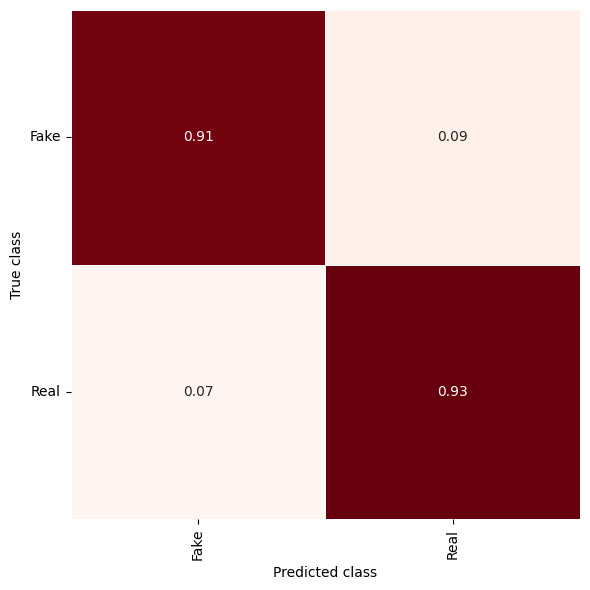

In [7]:
plot_confusion_matrix(evaluate_model(model, test_loader, device, classes), classes)

*StyleGAN Dataset 140k*

In [6]:
_, _, test_dataset = get_xhlulu_140k_real_and_fake_dataset(transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

Test accuracy: 51.670
AUC: 0.520


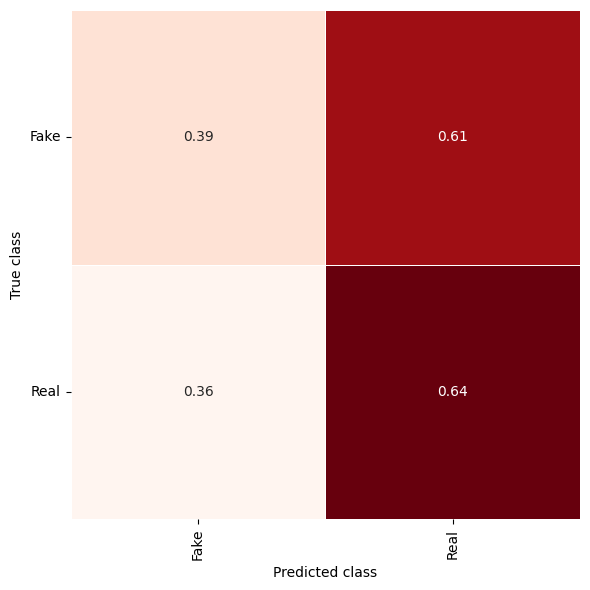

In [7]:
plot_confusion_matrix(evaluate_model(model, test_loader, device, classes), classes)

Some random dataset from Kaggle

Test accuracy: 54.590
AUC: 0.551


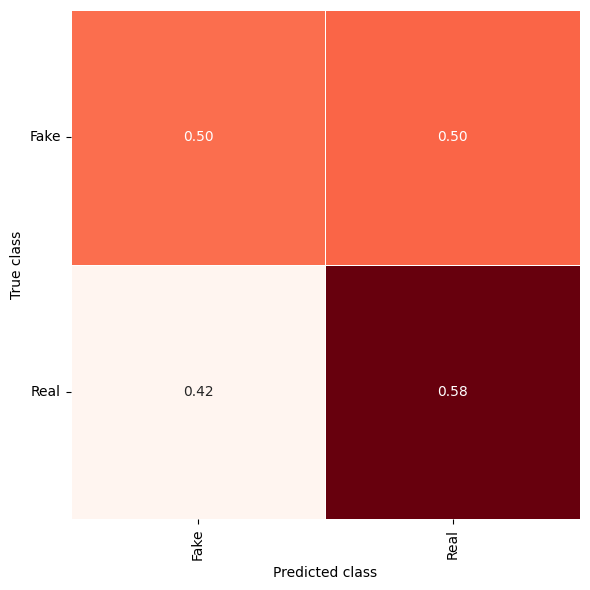

In [8]:
_, _, test_dataset = get_alaaeddineayadi_real_vs_fake_dataset(transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)
plot_confusion_matrix(evaluate_model(model, test_loader, device, classes), classes)